In [ ]:
pip install --upgrade pip

In [ ]:
pip install matplotlib

In [ ]:
pip install networkx

In [ ]:
pip install seaborn

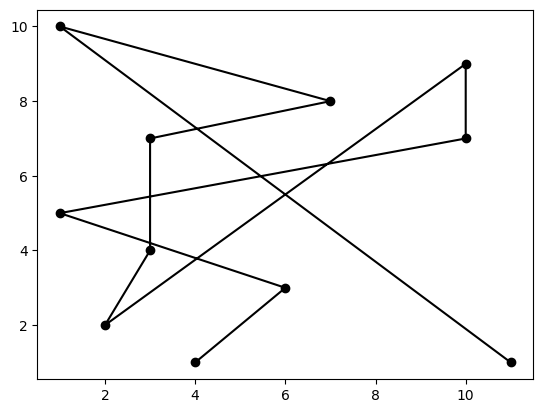

In [6]:
import matplotlib.pyplot as mpl

x = [4, 6, 1, 10, 10, 2, 3, 3, 7, 1, 11]

y = [1, 3, 5, 7, 9, 2, 4, 7, 8, 10, 1]

mpl.plot(x, y, color = "black", marker = 'o', markerfacecolor = "black")

mpl.show()

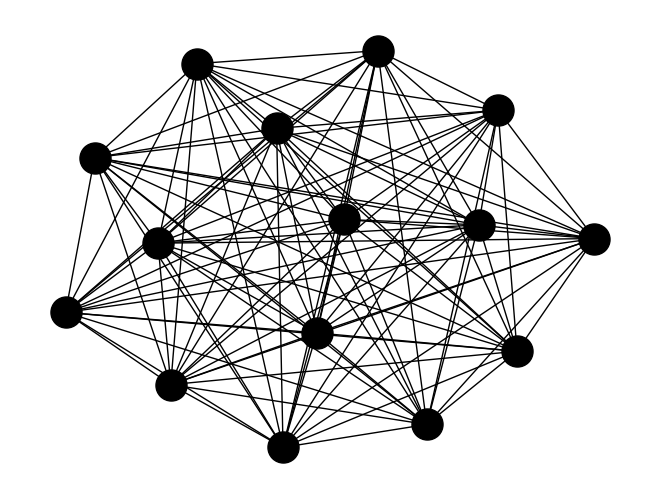

In [7]:
import networkx as ntx

complete_Graph = ntx.complete_graph(15)

ntx.draw(complete_Graph, node_color = 'black', node_size = 500)

Graph is bipartite!


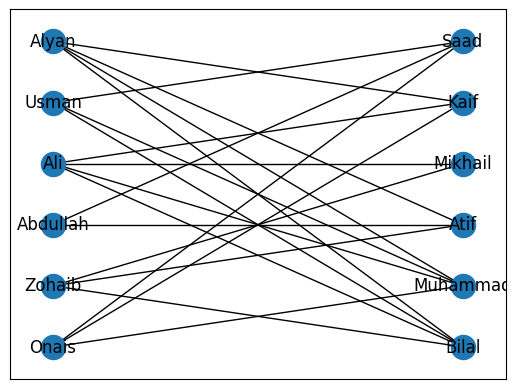

In [2]:
import networkx as ntx
from networkx.algorithms import bipartite

bpGraph = ntx.Graph()

bpGraph.add_nodes_from(["Onais", "Zohaib", "Abdullah", "Ali", "Usman", "Alyan"], bipartite = 0)
bpGraph.add_nodes_from(["Bilal", "Muhammad", "Atif", "Mikhail", "Kaif", "Saad"], bipartite = 1)

bpGraph.add_edges_from([("Onais", "Muhammad"), ("Onais", "Saad"), ("Onais", "Kaif"), 
                        ("Zohaib", "Atif"), ("Zohaib", "Bilal"), ("Zohaib", "Mikhail"),
                        ("Abdullah", "Saad"), ("Abdullah", "Atif"),
                        ("Ali", "Bilal"), ("Ali", "Mikhail"), ("Ali", "Kaif"), ("Ali", "Muhammad"),
                        ("Usman", "Saad"), ("Usman", "Muhammad"), ("Usman", "Bilal"),
                        ("Alyan", "Bilal"), ("Alyan", "Atif"), ("Alyan", "Kaif"), ("Alyan", "Muhammad")])

if bipartite.is_bipartite(bpGraph):
    print("Graph is bipartite!")
else:
    print("Graph is not bipartite")

ntx.draw_networkx(bpGraph, pos = ntx.drawing.layout.bipartite_layout(bpGraph, ['Onais','Zohaib','Abdullah', 'Ali', 'Usman', 'Alyan']), width = 1)

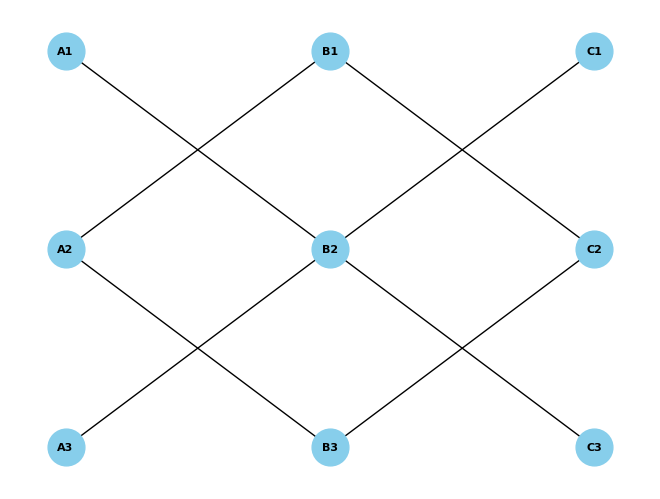

In [5]:
import networkx as ntx
import matplotlib.pyplot as plt

## Tripartite Graph
set1 = {'A1', 'A2', 'A3'}
set2 = {'B1', 'B2', 'B3'}
set3 = {'C1', 'C2', 'C3'}

G = ntx.Graph()

G.add_nodes_from(set1, bipartite=0)  # 0 represents the first set
G.add_nodes_from(set2, bipartite=1)  # 1 represents the second set
G.add_nodes_from(set3, bipartite=2)  # 2 represents the third set

edges = [('A1', 'B2'), ('A2', 'B1'), ('A2', 'B3'), ('A3', 'B2'),
         ('B1', 'C2'), ('B2', 'C1'), ('B2', 'C3'), ('B3', 'C2')]

G.add_edges_from(edges)

pos = {'A1': (0, 1), 'A2': (0, 0), 'A3': (0, -1),
       'B1': (1, 1), 'B2': (1, 0), 'B3': (1, -1),
       'C1': (2, 1), 'C2': (2, 0), 'C3': (2, -1)}
ntx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=8)

plt.show()

A simple graph can be drawn with these degree sequence


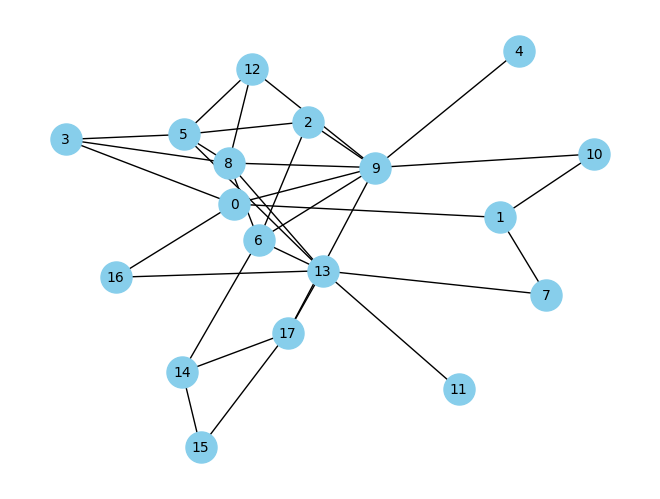

In [9]:
import networkx as ntx

def checkAllZeros(list):
    if len(list) == 0:
        return True
    for i in list:
        if(i != 0):
            return False
    return True

def havelHakimi(degree_Sequence):
    degree_Sequence.sort(reverse = True)
    while(checkAllZeros(degree_Sequence) == False):
        largest = degree_Sequence[0]
        if(largest >= len(degree_Sequence)):
            return False
        degree_Sequence[0] = 0
        for i in range(1, largest, 1):
            if degree_Sequence[i] == 0:
                return False
            degree_Sequence[i] -= 1
        degree_Sequence.sort(reverse = True)
    
    # If it reaches this point, it means all degrees have been 
    # reduced to 0 and therefore havel hakimi theorem has passed
    return True


degree_Sequence = [4, 3, 3, 3, 1, 5, 5, 2, 6, 8, 2, 1, 3, 7, 3, 2, 2, 4]
parameter_degree_sequence = degree_Sequence.copy()
if(havelHakimi(parameter_degree_sequence)):
    print("A simple graph can be drawn with these degree sequence")
    G = ntx.random_degree_sequence_graph(degree_Sequence)
    pos = ntx.spring_layout(G)
    ntx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_color='black', font_size=10)
else:
    print("A simple graph cannot be drawn with the given degree sequence")